In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor


from sklearn.linear_model import LinearRegression

In [66]:
df = pd.read_csv("final_dataframe.csv")

In [67]:
df

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,GarageYrBlt_2003,GarageYrBlt_2004,GarageYrBlt_2005,GarageYrBlt_2006,GarageYrBlt_2007,GarageYrBlt_2008,GarageYrBlt_2009,GarageYrBlt_2010,GarageYrBlt_Does Not Have,AggSF
0,65,8450,7,5,196,3,2,4,3,1,...,1,0,0,0,0,0,0,0,0,3114
1,80,9600,6,8,0,2,2,4,3,4,...,0,0,0,0,0,0,0,0,0,2984
2,68,11250,7,5,162,3,2,4,3,2,...,0,0,0,0,0,0,0,0,0,3314
3,60,9550,7,5,0,2,2,3,4,1,...,0,0,0,0,0,0,0,0,0,3115
4,84,14260,8,5,350,3,2,4,3,3,...,0,0,0,0,0,0,0,0,0,4179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62,7917,6,5,0,2,2,4,3,1,...,0,0,0,0,0,0,0,0,0,3060
1456,85,13175,6,6,119,2,2,4,3,1,...,0,0,0,0,0,0,0,0,0,4115
1457,66,9042,7,9,0,4,3,3,4,1,...,0,0,0,0,0,0,0,0,0,3744
1458,68,9717,5,6,0,2,2,3,3,2,...,0,0,0,0,0,0,0,0,0,2396


In [126]:
# X = df.drop("SalePrice", axis=1)
X = df[important_index]

y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
scaled_X_train = ss.fit_transform(X_train)
scaled_X_test = ss.transform(X_test)
X

,AggSF,OverallQual,2ndFlrSF,KitchenQual,BsmtQual,BsmtFinSF1,GrLivArea,LotArea,BsmtUnfSF,LotFrontage,...,GarageYrBlt_1965,YearRemodAdd_2004,GarageYrBlt_2008,Fence_GdWo,LotShape_IR2,3SsnPorch,Exterior1st_BrkComm,Fence_GdPrv,YearRemodAdd_1989,YearRemodAdd_2005
0,3114,7,854,3,4,706,1710,8450,150,65,...,0,0,0,0,0,0,0,0,0,0
1,2984,6,0,2,4,978,1262,9600,284,80,...,0,0,0,0,0,0,0,0,0,0
2,3314,7,866,3,4,486,1786,11250,434,68,...,0,0,0,0,0,0,0,0,0,0
3,3115,7,756,3,3,216,1717,9550,540,60,...,0,0,0,0,0,0,0,0,0,0
4,4179,8,1053,3,4,655,2198,14260,490,84,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3060,6,694,2,4,0,1647,7917,953,62,...,0,0,0,0,0,0,0,0,0,0
1456,4115,6,0,2,4,790,2073,13175,589,85,...,0,0,0,0,0,0,0,0,0,0
1457,3744,7,1152,3,3,275,2340,9042,877,66,...,0,0,0,0,0,0,0,1,0,0
1458,2396,5,0,3,3,49,1078,9717,0,68,...,0,0,0,0,0,0,0,0,0,0


In [105]:
rfr = RandomForestRegressor()

rfr.fit(scaled_X_train, y_train)
y_pred0 = rfr.predict(scaled_X_train)
y_pred = rfr.predict(scaled_X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 11110.878848400223
Test RMSE: 29879.21169545467


In [ ]:
# Features used =132 (the top important)
# Train RMSE: 10872.57567244795
# Test RMSE: 31327.169785464463

# Features used =252 (the top important)
# Train RMSE: 10968.0749225494
# Test RMSE: 31317.279333587183

# Features used =100 (the top important)
# Train RMSE: 10805.823016808501
# Test RMSE: 30911.613278398007

# Features used =50 (the top important)
# Train RMSE: 11240.72618642726
# Test RMSE: 31044.837560894928


# Features used =110 (the top important)
# Train RMSE: 11110.878848400223
# Test RMSE: 29879.21169545467

In [106]:
lasso = Lasso()

lasso.fit(X_train, y_train)
y_pred0 = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 27724.634237145012
Test RMSE: 34085.38022148854


C:\Users\EngMA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 443348734295.219, tolerance: 696659484.3571945
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Features used =132 (the top important)
# Train RMSE: 26900.977127642407
# Test RMSE: 34769.654663535606

# Features used =252 (the top important)
# Train RMSE: 23833.27467543582
# Test RMSE: 34678.98027124445

# Features used =100 (the top important)
# Train RMSE: 27901.775089800736
# Test RMSE: 33489.982852708585

# Features used =50 (the top important)
# Train RMSE: 32197.44009255128
# Test RMSE: 34766.98996229141


# Features used =110 (the top important)
# Train RMSE: 27724.634237145012
# Test RMSE: 34085.38022148854

In [142]:
gbr = GradientBoostingRegressor()

gbr.fit(scaled_X_train, y_train)
y_pred0 = gbr.predict(scaled_X_train)
y_pred = gbr.predict(scaled_X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
log_test_rmse = (np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred))))
print(gbr.score(scaled_X_test,y_test))
print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}\n log_test_rmse: {log_test_rmse}")



0.9035643672497329
Train RMSE: 13512.08241985413
Test RMSE: 27197.29326957091
 log_test_rmse: 0.14224553542686438


AttributeError: 'Series' object has no attribute 'join'

In [150]:
testing= pd.DataFrame()
testing["ytest"]=y_test
testing["ypred"]=y_pred
testing

,ytest,ypred
892,154500,140124.521150
1105,325000,340093.225349
413,115000,111982.638930
522,159000,150123.108036
1036,315500,322853.925830
...,...,...
479,89471,116759.690160
1361,260000,253121.915961
802,189000,189945.986258
651,108000,128228.866490


In [130]:
# Features used =132 (the top important)
# Train RMSE: 13512.08241985413
# Test RMSE: 26769.53712099131

# Features used =252 (the top important)
# Train RMSE: 13553.762894080202
# Test RMSE: 27952.643952363356

# Features used =100 (the top important)
# Train RMSE: 13552.797778151087
# Test RMSE: 27042.012674974452

# Features used =50 (the top important)
# Train RMSE: 14221.953043867901
# Test RMSE: 27787.420929581058

# Features used =110 (the top important)
# Train RMSE: 13554.770504438837
# Test RMSE: 27781.769012262015

In [108]:
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01, max_depth=7) 

xgb.fit(X_train, y_train)
y_pred0 = xgb.predict(X_train)
y_pred = xgb.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 4212.322130087129
Test RMSE: 28518.43394959957


In [ ]:
# Features used =132 (the top important)
# Train RMSE: 4250.378115433559
# Test RMSE: 28229.364003549268

# Features used =252 (the top important)
# Train RMSE: 4130.241498553838
# Test RMSE: 28705.99171082086

# Features used =100 (the top important)
# Train RMSE: 4255.37150047599
# Test RMSE: 28366.830013347975

In [109]:
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred0 = lr.predict(X_train)
y_pred = lr.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 27724.518831446116
Test RMSE: 34144.83534322034


In [ ]:
# Features used =132 (the top important)
# Train RMSE: 26900.74418849311
# Test RMSE: 34848.01954186513

# Features used =252 (the top important)
# Train RMSE: 26900.74418849311
# Test RMSE: 34848.01954186513

# Features used =100 (the top important)
# Train RMSE: 27901.630973713163
# Test RMSE: 33542.02163772606

<AxesSubplot:>

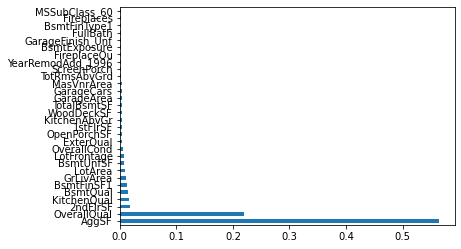

In [30]:
feat_importances = pd.Series(rfr.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')

In [125]:

new_important_features= feat_importances.sort_values(ascending=False)

# print(feat_importances.index)

# print(new_important_features.index)


important_index=[] 
i=0

for j in new_important_features.index:
    important_index.append(j)
    if i>130:
        break
    i+=1
    
len(important_index)    
 

132

## Parameter Tuning: Grid Search

In [134]:
gbr_parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }


grid_gbr = GridSearchCV(estimator= gbr, param_grid=gbr_parameters, cv=3, n_jobs=-1)

grid_gbr.fit(scaled_X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_gbr.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_gbr.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_gbr.best_params_)

KeyboardInterrupt: 

In [133]:
best_gbr = GradientBoostingRegressor(learning_rate=0.04, max_depth=4, n_estimators=1000,
                          subsample=0.5)

best_gbr.fit(scaled_X_train, y_train)
y_pred0 = best_gbr.predict(scaled_X_train)
y_pred = best_gbr.predict(scaled_X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 3232.331763762648
Test RMSE: 26952.05934528381


In [ ]:
# Features used =132 (the top important)
# Train RMSE: 3269.8581991147457
# Test RMSE: 25249.814217985793

# Features used =252 (the top important)
# Train RMSE: 3613.6860461828014
# Test RMSE: 27421.66052895415